<a href="https://colab.research.google.com/github/Manos-Mak120/-/blob/Vectorization/BIDEN_VECTORIZATION_ATHENS_VOICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

In [ ]:
 !python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 44.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
biden_articles_df = pd.read_csv("/content/drive/MyDrive/Athens.voice/Articles/bIden_articles-20 21.ATHENSVOICE.csv")
biden_articles_df.head(200) # This is a syntax error - head() takes an int argument not slice

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/politi...,Μπάιντεν: 100 μέρες επιτυχίας παρά τη διχαστικ...,2021-04-29,14:37:00,Πολιτικη & Οικονομια,Άγης Παπαγεωργίου,ΗΠΑ: Ο απολογισμός των πρώτων 100 ημερών της Π...,Παρά το απόλυτα θετικό του έργο σε πολλούς τομ...,Σήμερα ο Τζο Μπάιντεν κλείνει τις πρώτες του ε...,https://www.athensvoice.gr/images/1074x600/3/j...
1,https://www.athensvoice.gr/life/perivallon/712...,Πώς ο Τζο Μπάιντεν θα αντιμετωπίσει την κλιματ...,2021-04-29,09:22:00,Περιβαλλον,Newsroom,Το πολύ φιλόδοξο πρόγραμμα Green New Deal -και...,Πρόγραμμα 3 τρισεκατομμυρίων για τις υποδομές,Όπως είχε υποσχεθεί στην προεκλογική του εκστρ...,https://www.athensvoice.gr/images/1074x600/3/j...
2,https://www.athensvoice.gr/epikairotita/diethn...,DW: Οι 100 ημέρες του Τζο Μπάιντεν στον Λευκό ...,2021-04-29,07:53:00,Κοσμος,Newsroom,Τζο Μπάιντεν: Ο απολογισμός για τις πρώτες 100...,Πώς «θεσπίστηκε» ο απολογισμός των 100 ημερών,Η συνήθεια να γίνεται απολογισμός των πρώτων 1...,https://www.athensvoice.gr/images/1074x600/3/j...
3,https://www.athensvoice.gr/epikairotita/diethn...,Μπάιντεν: Δεν επιδιώκουμε κλιμάκωση με τη Ρωσία,2021-04-29,04:26:51,Κοσμος,Newsroom,Ο Τζο Μπάιντεν ξεκαθάρισε πως δεν επιδιώκει τη...,"«Οι ενέργειές τους, ωστόσο, θα έχουν συνέπειες»","Στην ομιλία του ενώπιον του Κογκρέσου, ο Τζο Μ...",https://www.athensvoice.gr/images/1074x600/3/j...
4,https://www.athensvoice.gr/epikairotita/diethn...,Γενοκτονία Αρμενίων: Ψήφισμα κατά Μπάιντεν από...,2021-04-27,16:26:32,Κοσμος,Newsroom,Τι αναφέρει το ψήφισμα της τουρκικής βουλής πο...,«Ο πρόεδρος των ΗΠΑ δεν έχει κανένα νομικό και...,Η τουρκική εθνοσυνέλευση ενέκρινε σήμερα ψήφισ...,https://www.athensvoice.gr/images/1074x600/3/j...
...,...,...,...,...,...,...,...,...,...,...
195,https://www.athensvoice.gr/epikairotita/diethn...,Τουρκία: Δεν αναμένουμε κυρώσεις για τους S-40...,2020-11-26,14:38:00,Κοσμος,Newsroom,Τουρκία: Τι λέει ανώτατος αξιωματούχος για τις...,«Δεν θα θελήσει να διατηρήσει την ένταση στις ...,Ανώτατος αξιωματούχος της τουρκικής κυβέρνησης...,https://www.athensvoice.gr/images/1074x600/3/j...
196,https://www.athensvoice.gr/epikairotita/politi...,Η επικίνδυνη αποστολή του Τζο Μπάιντεν,2020-11-25,13:27:00,Πολιτικη & Οικονομια,Ρωμανός Γεροδήμος,Μια Τριλογία για τις ΗΠΑ με αφορμή τις Αμερικα...,Τι μπορεί να καταφέρει ο Τζο Μπάιντεν; Τι μορφ...,"[Η Τριλογία του Νέου Κόσμου, μέρος 3ο. Διαβάστ...",https://www.athensvoice.gr/images/1074x600/3/j...
197,https://www.athensvoice.gr/epikairotita/diethn...,Μπάιντεν: Δεν θα είναι μια τρίτη θητεία του Ομ...,2020-11-25,11:18:55,Κοσμος,Newsroom,Ο Τζο Μπαίντεν έδωσε την πρώτη του συνέντευξη ...,Η πρώτη του συνέντευξη μετά τις εκλογές,Η Αμερική επέστρεψε. Είμαστε ξανά στην κεφαλή ...,https://www.athensvoice.gr/images/1074x600/3/j...
198,https://www.athensvoice.gr/epikairotita/diethn...,"Μπάιντεν: Η Αμερική επέστρεψε, έτοιμη να καθοδ...",2020-11-24,20:39:00,Κοσμος,Newsroom,Ο Τζο Μπάιντεν ανακοίνωσε τα μέλη της κυβέρνησ...,"Άντονι Μπλίνκεν, ο επόμενος Αμερικανός ΥΠΕΞ κα...",Οι ΗΠΑ είναι «έτοιμες να αναλάβουν ηγετικό ρόλ...,https://www.athensvoice.gr/images/1074x600/3/j...


In [ ]:
biden_articles_df.loc[0, 'date']

'2021-04-29'

In [ ]:
biden_articles_df.head(1)

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/politi...,Μπάιντεν: 100 μέρες επιτυχίας παρά τη διχαστικ...,2021-04-29,14:37:00,Πολιτικη & Οικονομια,Άγης Παπαγεωργίου,ΗΠΑ: Ο απολογισμός των πρώτων 100 ημερών της Π...,Παρά το απόλυτα θετικό του έργο σε πολλούς τομ...,Σήμερα ο Τζο Μπάιντεν κλείνει τις πρώτες του ε...,https://www.athensvoice.gr/images/1074x600/3/j...


In [ ]:
biden_articles_df.dtypes

,0
article_url,object
title,object
date,object
time,object
section,object
author,object
excerpt,object
subtitle,object
text_body,object
feat_img_link,object


In [ ]:
# Select the 'date' and 'time' columns and concatenate their string representations
# with a space in between to form a single string column suitable for pd.to_datetime

# Ensure the 'time' column is treated as strings
biden_articles_df['time'] = biden_articles_df['time'].astype(str)

# Extract only the hour and minute from the time string using string slicing
# Assumes the format is consistently 'HH:MM:SS' or similar at the start
biden_articles_df['time_formatted'] = biden_articles_df['time'].str[:5]

datetime_str = biden_articles_df['date'].astype(str) + ' ' + biden_articles_df['time_formatted']

# Convert the combined string column to datetime objects
# Use the format that matches the concatenated string
biden_articles_df['datetime'] = pd.to_datetime(datetime_str, format='%Y-%m-%d %H:%M')

# Display the first few rows to verify the new 'datetime' column
biden_articles_df.head()

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link,time_formatted,datetime
0,https://www.athensvoice.gr/epikairotita/politi...,Μπάιντεν: 100 μέρες επιτυχίας παρά τη διχαστικ...,2021-04-29,14:37:00,Πολιτικη & Οικονομια,Άγης Παπαγεωργίου,ΗΠΑ: Ο απολογισμός των πρώτων 100 ημερών της Π...,Παρά το απόλυτα θετικό του έργο σε πολλούς τομ...,Σήμερα ο Τζο Μπάιντεν κλείνει τις πρώτες του ε...,https://www.athensvoice.gr/images/1074x600/3/j...,14:37,2021-04-29 14:37:00
1,https://www.athensvoice.gr/life/perivallon/712...,Πώς ο Τζο Μπάιντεν θα αντιμετωπίσει την κλιματ...,2021-04-29,09:22:00,Περιβαλλον,Newsroom,Το πολύ φιλόδοξο πρόγραμμα Green New Deal -και...,Πρόγραμμα 3 τρισεκατομμυρίων για τις υποδομές,Όπως είχε υποσχεθεί στην προεκλογική του εκστρ...,https://www.athensvoice.gr/images/1074x600/3/j...,09:22,2021-04-29 09:22:00
2,https://www.athensvoice.gr/epikairotita/diethn...,DW: Οι 100 ημέρες του Τζο Μπάιντεν στον Λευκό ...,2021-04-29,07:53:00,Κοσμος,Newsroom,Τζο Μπάιντεν: Ο απολογισμός για τις πρώτες 100...,Πώς «θεσπίστηκε» ο απολογισμός των 100 ημερών,Η συνήθεια να γίνεται απολογισμός των πρώτων 1...,https://www.athensvoice.gr/images/1074x600/3/j...,07:53,2021-04-29 07:53:00
3,https://www.athensvoice.gr/epikairotita/diethn...,Μπάιντεν: Δεν επιδιώκουμε κλιμάκωση με τη Ρωσία,2021-04-29,04:26:51,Κοσμος,Newsroom,Ο Τζο Μπάιντεν ξεκαθάρισε πως δεν επιδιώκει τη...,"«Οι ενέργειές τους, ωστόσο, θα έχουν συνέπειες»","Στην ομιλία του ενώπιον του Κογκρέσου, ο Τζο Μ...",https://www.athensvoice.gr/images/1074x600/3/j...,04:26,2021-04-29 04:26:00
4,https://www.athensvoice.gr/epikairotita/diethn...,Γενοκτονία Αρμενίων: Ψήφισμα κατά Μπάιντεν από...,2021-04-27,16:26:32,Κοσμος,Newsroom,Τι αναφέρει το ψήφισμα της τουρκικής βουλής πο...,«Ο πρόεδρος των ΗΠΑ δεν έχει κανένα νομικό και...,Η τουρκική εθνοσυνέλευση ενέκρινε σήμερα ψήφισ...,https://www.athensvoice.gr/images/1074x600/3/j...,16:26,2021-04-27 16:26:00


In [ ]:
short_biden_df = biden_articles_df[['datetime','excerpt']]
short_biden_df = short_biden_df.reset_index(drop=True)
# Now that short_biden_df is defined, we can localize the timezone
short_biden_df['datetime'] = short_biden_df['datetime'].dt.tz_localize(None)
short_biden_df.head(1)

,datetime,excerpt
0,2021-04-29 14:37:00,ΗΠΑ: Ο απολογισμός των πρώτων 100 ημερών της Π...


In [ ]:
short_biden_df['datetime'] = short_biden_df['datetime'].dt.tz_localize(None)

In [ ]:
short_biden_df = biden_articles_df[['datetime','excerpt']]
short_biden_df = short_biden_df.reset_index(drop=True)
short_biden_df.head(1)

,datetime,excerpt
0,2021-04-29 14:37:00,ΗΠΑ: Ο απολογισμός των πρώτων 100 ημερών της Π...


In [ ]:
short_biden_df['year'] = pd.DatetimeIndex(short_biden_df['datetime']).year
short_biden_df['month'] = pd.DatetimeIndex(short_biden_df['datetime']).month
short_biden_df['day'] = pd.DatetimeIndex(short_biden_df['datetime']).day
short_biden_df['hour'] = pd.DatetimeIndex(short_biden_df['datetime']).hour

In [ ]:
short_biden_df.head()

,datetime,excerpt,year,month,day,hour
0,2021-04-29 14:37:00,ΗΠΑ: Ο απολογισμός των πρώτων 100 ημερών της Π...,2021,4,29,14
1,2021-04-29 09:22:00,Το πολύ φιλόδοξο πρόγραμμα Green New Deal -και...,2021,4,29,9
2,2021-04-29 07:53:00,Τζο Μπάιντεν: Ο απολογισμός για τις πρώτες 100...,2021,4,29,7
3,2021-04-29 04:26:00,Ο Τζο Μπάιντεν ξεκαθάρισε πως δεν επιδιώκει τη...,2021,4,29,4
4,2021-04-27 16:26:00,Τι αναφέρει το ψήφισμα της τουρκικής βουλής πο...,2021,4,27,16


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer() #πάντα αυτό

In [ ]:
short_biden_df.head(5)

,datetime,excerpt,year,month,day,hour
0,2021-04-29 14:37:00,ΗΠΑ: Ο απολογισμός των πρώτων 100 ημερών της Π...,2021,4,29,14
1,2021-04-29 09:22:00,Το πολύ φιλόδοξο πρόγραμμα Green New Deal -και...,2021,4,29,9
2,2021-04-29 07:53:00,Τζο Μπάιντεν: Ο απολογισμός για τις πρώτες 100...,2021,4,29,7
3,2021-04-29 04:26:00,Ο Τζο Μπάιντεν ξεκαθάρισε πως δεν επιδιώκει τη...,2021,4,29,4
4,2021-04-27 16:26:00,Τι αναφέρει το ψήφισμα της τουρκικής βουλής πο...,2021,4,27,16


In [ ]:
short_biden_df.shape

(207, 6)

In [ ]:
short_biden_df['excerpt'] = short_biden_df['excerpt'].fillna('')

In [ ]:
count_vector = cv.fit_transform(short_biden_df['excerpt']) #παίρνουμε τα κείμενα

In [ ]:
count_vector #μοναδικές λέξεις 11520 + 120

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3752 stored elements and shape (207, 1318)>

In [ ]:
count_vector.shape

(207, 1318)

In [ ]:
BoW = cv.get_feature_names_out()
list(BoW)[1400:1410]

[]

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,10,100,11,12,13,17,18,19,1998,...,όπλο,όπλων,όπως,όρισε,όσα,όστιν,ότι,ύμνο,ύστατη,ώρες
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [ ]:
count_vector = cv.fit_transform(short_biden_df['excerpt'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,10,100,11,12,13,17,18,19,1998,...,ψήφο,ψήφους,ψήφων,όπλο,όπλων,όρισε,όστιν,ύμνο,ύστατη,ώρες
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), max_df=0.95, min_df=0.01) #πάρε ο,τι είναι πάνω του 95% των κειμένων

In [ ]:
count_vector = cv.fit_transform(short_biden_df['excerpt'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,100,19,2020,25,46ος,covid,lockdown,twitter,άντονι,...,τζο,τζόρτζια,τηλεφωνική,τουρκία,τουρκίας,τραμπ,χάρις,χαρακτήρισε,χώρα,ψήφων
0,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,αμερικανικές,ανακοίνωσε,απόφαση,αρμενίων,εκλογές,ηπα,κορωνοϊού,μπάιντεν,νέος,νίκη,ντόναλντ,ορκωμοσία,ουάσινγκτον,πούτιν,προέδρου,πρόεδρος,σύμφωνα,τζο,τραμπ,χάρις
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,αμερικανικές,ανακοίνωσε,απόφαση,αρμενίων,εκλογές,ηπα,κορωνοϊού,μπάιντεν,νέος,νίκη,ντόναλντ,ορκωμοσία,ουάσινγκτον,πούτιν,προέδρου,πρόεδρος,σύμφωνα,τζο,τραμπ,χάρις
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,46ος πρόεδρος,άντονι μπλίνκεν,αμερικανικές εκλογές,αμερικανός πρόεδρος,βλαντίμιρ πούτιν,γενοκτονία αρμενίων,εκλεγμένος πρόεδρος,ηπα τζο,καμάλα χάρις,λευκό οίκο,νέος πρόεδρος,νίκη τζο,ντόναλντ τραμπ,ορκωμοσία μπάιντεν,ορκωμοσία τζο,προέδρου ηπα,πρόεδρος ηπα,πρόεδρος τζο,ταγίπ ερντογάν,τζο μπάιντεν
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
results.sum(axis =0).sort_values(ascending = False) #Προσθήκη axis στο συνολο των αποτελσμάτων . Στα rows. Μελετάει τις εμφανίσεις αυτού τοτ term.

,0
τζο μπάιντεν,161
πρόεδρος ηπα,25
ντόναλντ τραμπ,18
ηπα τζο,13
πρόεδρος τζο,13
ορκωμοσία τζο,10
ορκωμοσία μπάιντεν,8
46ος πρόεδρος,7
λευκό οίκο,7
νέος πρόεδρος,7


In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

,0
τζο μπάιντεν,161
πρόεδρος ηπα,25
ντόναλντ τραμπ,18
ηπα τζο,13
πρόεδρος τζο,13


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,  #Με αυτό το τρόπο φτιάχνουμε ένα λεξικό παίρνωντας τις λέξεις
                     vocabulary = ['εκλογές', 'πρόεδρος', 'ορκομωσία'])
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,εκλογές,πρόεδρος,ορκομωσία
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
results.sort_values(by=['εκλογές'], ascending=False).head()

,εκλογές,πρόεδρος,ορκομωσία
39,1,0,0
197,1,0,0
200,1,0,0
185,1,0,0
163,1,0,0


In [ ]:
short_biden_df['excerpt'].loc[10]

'Για «σκάνδαλο» κάνουν λόγο αρκετά ΜΜΕ σχολιάζοντας την απόφαση του Τζο Μπάιντεν να αναγνωρίσει τη Γενοκτονία των Αρμενίων'

In [ ]:
biden_articles_df['title'].loc[10]

'Τουρκικά ΜΜΕ- Γενοκτονία Αρμενίων: «Σκανδαλο η απόφαση Μπάιντεν»'

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=10, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_biden_df.iloc[[10]]['excerpt'])
results114 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
sum_words114 =  results114.sum(axis =0)
sum_words114.sort_values(ascending = False).head()

,0
αναγνωρίσει γενοκτονία,1
απόφαση τζο,1
γενοκτονία αρμενίων,1
κάνουν λόγο,1
λόγο μμε,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_biden_df['excerpt'])  #finds the tfidf score with normalization

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,000,100,12,13,17,18,19,1998,1η,200,...,χρόνια,χρόνων,χώρα,χώρας,χώρες,ψήφισμα,ψήφο,ψήφους,ψήφων,ύμνο
0,0.0,0.295876,0.0,0.0,0.0,0.0,0.295876,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.412257,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.456017,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity #ΚΑΤΑ ΠΟΣΟ ΤΑ ΑΡΘΡΑ ΜΟΥ ΔΙΑΦΕΡΟΥΝ ΑΠΟ ΤΟΥΣ ΥΠΟΛΟΙΠΟΥΣ. ΠΟΣΟ ΟΙ ΑΛΛΟΙ ΕΧΟΥΝ ΕΠΗΡΕΑΣΤΕΙ ΑΠΟ ΜΕΝΑ

print("cosine scores ==> ")
print(cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with all elements (including itself)

cosine scores ==> 
[[1.         0.14123238 0.28554051 0.0053198  0.01193536 0.00668669
  0.22025071 0.00590851 0.00710486 0.00782218 0.00663207 0.00579853
  0.00604455 0.00667866 0.00514649 0.         0.0055886  0.02623933
  0.02621274 0.13312303 0.0046937  0.00582311 0.         0.0328543
  0.00605423 0.00556126 0.03692194 0.02338901 0.00655179 0.00703434
  0.03201999 0.         0.02722631 0.03477503 0.02358463 0.03331178
  0.03434132 0.         0.00569412 0.00601802 0.02056584 0.
  0.20432374 0.00615645 0.00618802 0.02488341 0.00533771 0.00649754
  0.0052999  0.00582604 0.00497141 0.1944267  0.00576848 0.01118472
  0.0258677  0.00744762 0.02101583 0.0066463  0.02615143 0.
  0.         0.00514638 0.00886938 0.00793662 0.02530632 0.00615422
  0.0051239  0.03138175 0.00471016 0.00617596 0.02817713 0.01804752
  0.03894551 0.         0.00531758 0.         0.00568664 0.
  0.02773625 0.00672278 0.00614648 0.00644894 0.0082976  0.03024466
  0.         0.00572222 0.         0.00590265 0.214899

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train) # συγκρίνουμε όλα τα άρθρα μεταξύ τους

In [ ]:
len(arr)

207

<Axes: >

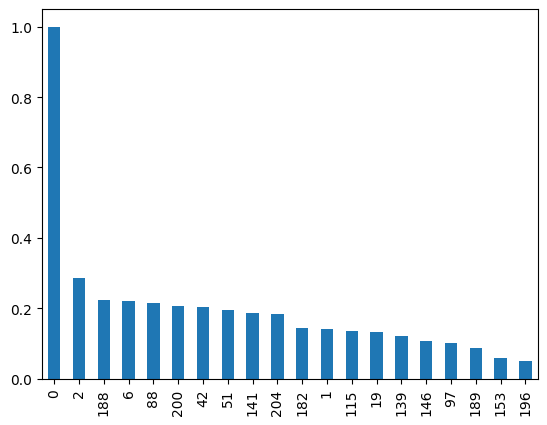

In [ ]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

Βλέπουμε ότι με το 1ο άρθρο μοιάζει περισσότερο το 4ο

In [ ]:
short_biden_df['excerpt'].loc[0]

'ΗΠΑ: Ο απολογισμός των πρώτων 100 ημερών της Προεδρίας Μπάιντεν είναι ανέλπιστα επιτυχής. Covid-19, κλιματική αλλαγή, σύσφιξη σχέσεων με την Ευρωπαϊκή Ένωση.'

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_biden_df['excerpt'])  #finds the tfidf score with normalization

In [ ]:
short_biden_df['excerpt'].loc[4]

'Τι αναφέρει το ψήφισμα της τουρκικής βουλής που επικρίνει την απόφαση του Τζο Μπάιντεν να αναγνωρίσει τη Γενοκτονία του Τζο Μπάιντεν'

<Axes: >

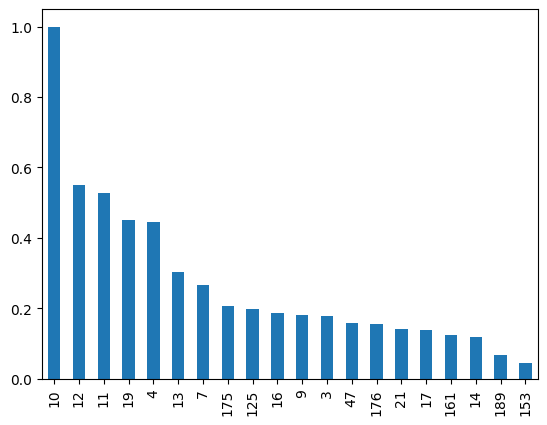

In [ ]:
pd.DataFrame(arr).loc[10].sort_values(ascending = False).head(20).plot(kind = 'bar')

<Axes: >

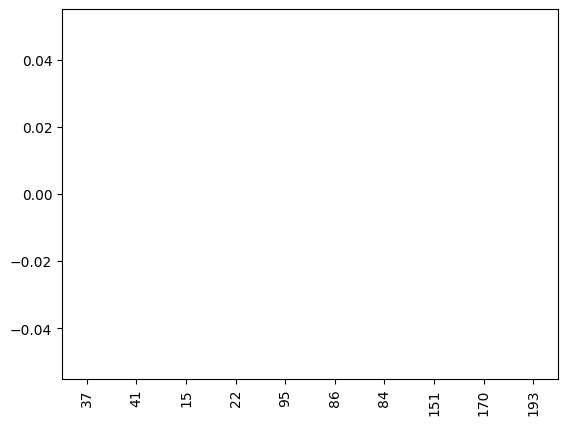

In [ ]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).tail(10).plot(kind = 'bar')

In [ ]:
short_biden_df['excerpt'].loc[10]

'Για «σκάνδαλο» κάνουν λόγο αρκετά ΜΜΕ σχολιάζοντας την απόφαση του Τζο Μπάιντεν να αναγνωρίσει τη Γενοκτονία των Αρμενίων'

In [ ]:
short_biden_df['excerpt'].loc[15]

'Τις νέες περιοχές που μπαίνουν στο επίπεδο πολύ αυξημένου κινδύνου («βαθύ κόκκινο») ανακοίνωσε ο Νίκος Χαρδαλιάς στη live ενημέρωση την Παρασκευή (23/4).'

In [ ]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10]) # συγκρίνουμε τα 10 πρώτα άρθρα μεταξύ τους

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων (Μπαίντεν: Athens Voice)'}>

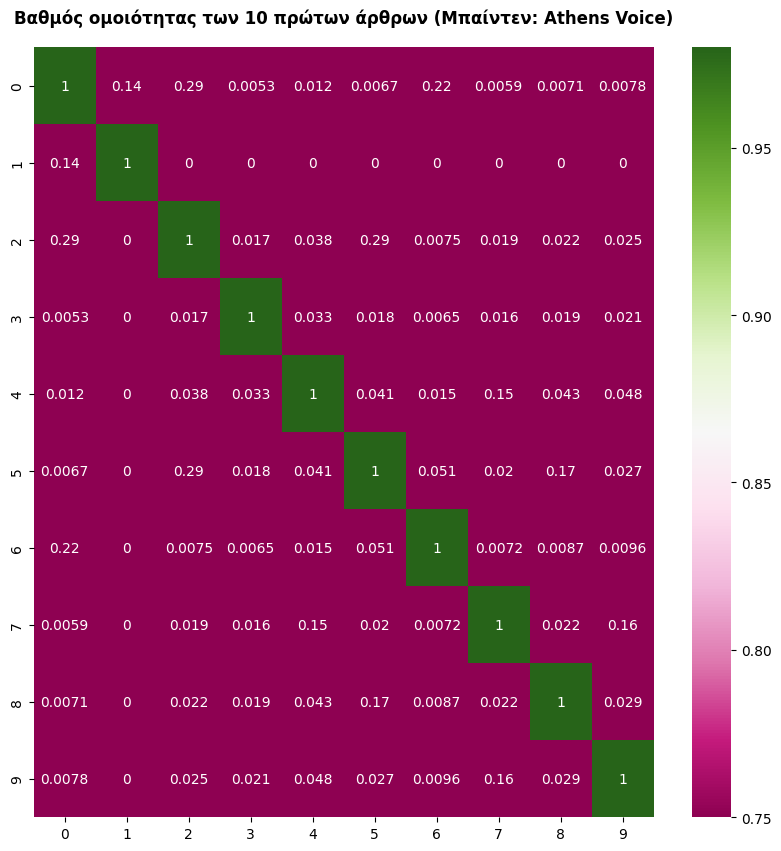

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων (Μπαίντεν: Athens Voice)', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

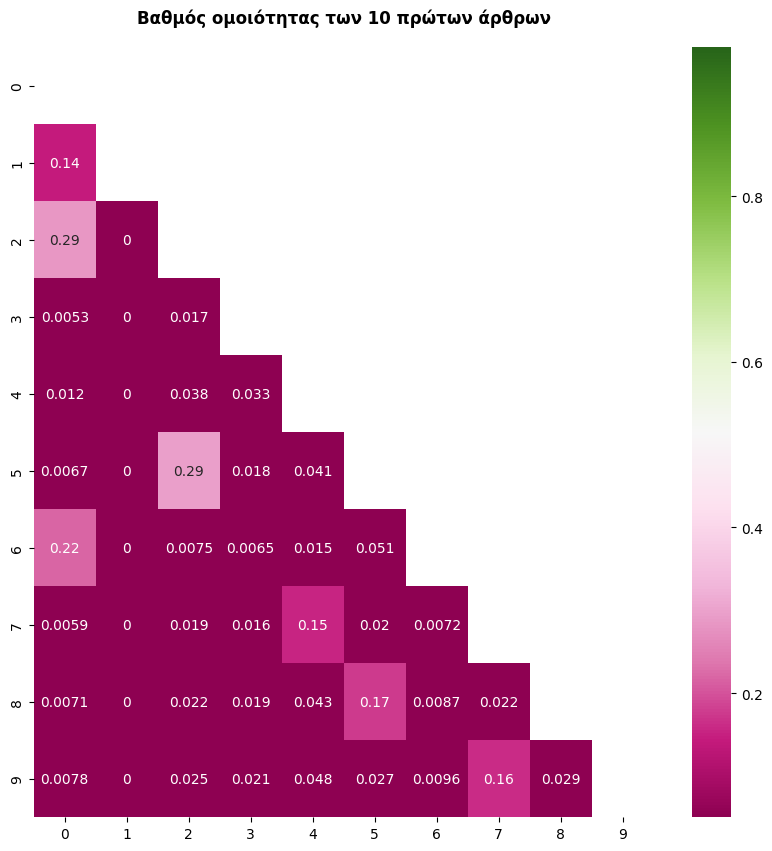

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

# mask
mask = np.triu(np.ones_like(arr, dtype=bool))
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG", mask=mask)

#plt.savefig('<το path και το όνομα του αρχείου>.png')